<a href="https://colab.research.google.com/github/GretelKMendez/Tareas-Mac-IA/blob/main/RedNeuronalMulticapa.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:

from sklearn.datasets import load_diabetes   #libreria para cargar el dataset de sklearn

#Cargamos el Dataset

diabetes = load_diabetes()
print(diabetes.keys())
print(diabetes.DESCR)

#de dode obtuvimos el dataset viene la informacion de la dimención del archivo con el que vamos a trabajar.


dict_keys(['data', 'target', 'frame', 'DESCR', 'feature_names', 'data_filename', 'target_filename', 'data_module'])
.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

:Number of Instances: 442

:Number of Attributes: First 10 columns are numeric predictive values

:Target: Column 11 is a quantitative measure of disease progression one year after baseline

:Attribute Information:
    - age     age in years
    - sex
    - bmi     body mass index
    - bp      average blood pressure
    - s1      tc, total serum cholesterol
    - s2      ldl, low-density lipoproteins
    - s3      hdl, high-density lipoproteins
    - s4      tch, total cholesterol / HDL
    - s5      ltg, possibly log 

In [11]:
import pandas as pd

X = pd.DataFrame(diabetes.data, columns=diabetes.feature_names) #son las caracteriscticas de cada paciente
y = diabetes.target #es el valor que queremos predecir.


In [12]:
from sklearn.model_selection import train_test_split # separa los datos en entrenamiento y prueba

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)
#Separa el 80 % de los datos para entrenar y el 20 % para probar.
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)


(353, 10)
(89, 10)
(353,)
(89,)


In [13]:
from sklearn.preprocessing import StandardScaler #normaliza los datos para que todas las variables tengan la misma escala

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [14]:
#Crear el modelo de red neuronal multicapa
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

modelo = Sequential([
    Dense(64, input_shape=(X_train.shape[1],), activation='relu'),
    Dense(32, activation='relu'),
    Dense(1, activation='linear') #1 neurona, activación linear porque estamos prediciendo un valor continuo, no categorías
])

from tensorflow.keras.optimizers import Adam

modelo.compile(
    optimizer=Adam(learning_rate=0.001), #indica cómo la red ajusta sus pesos
    loss='mean_squared_error', #mide el error que la red comete
    metrics=['mae']  #mostramos además el error medio absoluto (MAE) para interpretar mejor los resultados
)



/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [15]:
#Entrenar el modelo.
history = modelo.fit(
    X_train, y_train,
    epochs=50, batch_size=8,
    validation_data=(X_test, y_test),
    verbose=1
)
#epochs: cuántas veces damos vuelta al dataset.
#batch_size: número de ejemplos que procesa antes de actualizar los pesos.
#validation_data: sirve para evaluar el modelo en cada época sin afectar el entrenamiento.

Epoch 1/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 27743.0391 - mae: 148.3860 - val_loss: 25986.6660 - val_mae: 143.8298
Epoch 2/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 29705.1836 - mae: 151.7928 - val_loss: 24321.0586 - val_mae: 138.1719
Epoch 3/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 26379.5039 - mae: 143.4345 - val_loss: 20092.2480 - val_mae: 123.4455
Epoch 4/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 20878.2070 - mae: 122.9242 - val_loss: 13680.3916 - val_mae: 98.0801
Epoch 5/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 13771.3906 - mae: 95.2195 - val_loss: 7563.0845 - val_mae: 67.5458
Epoch 6/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 8464.9863 - mae: 70.6748 - val_loss: 4745.1528 - val_mae: 51.6752
Epoch 7/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 5392.3486 - mae: 57.9922 - val_loss: 4114.3770 - val_mae: 48.0148
Epoch 8/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 4214.9722 - mae: 50.7234 - val_loss: 3877.0115 - val_mae:

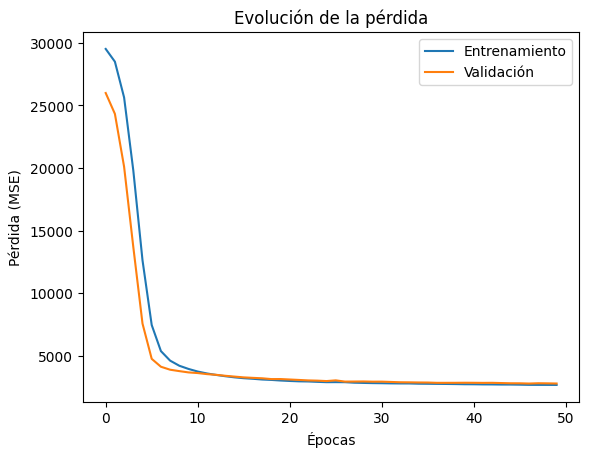

In [16]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'], label='Entrenamiento')
plt.plot(history.history['val_loss'], label='Validación')
plt.xlabel('Épocas')
plt.ylabel('Pérdida (MSE)')
plt.legend()
plt.title('Evolución de la pérdida')
plt.show()


In [17]:
predicciones = modelo.predict(X_test)
comparison = pd.DataFrame({
    "Real": y_test[:10],
    "Predicho": predicciones[:10].flatten()
})
print(comparison)


3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 130ms/step
    Real    Predicho
0  219.0  161.761017
1   70.0  182.167023
2  202.0  147.009277
3  230.0  308.339661
4  111.0  102.493340
5   84.0  116.754501
6  242.0  266.044647
7  272.0  182.398682
8   94.0   91.666847
9   96.0   79.332451
